## Analisa Data Bongkar dan Muat Barang melalui Jalur Transportasi Laut

**Aini Hanifa**<br>
_Kelas Big Data B_<br>

Sumber data : https://data.go.id/dataset/data-bongkar-dan-muat-barang-melalui-jalur-transportasi-laut

Dataset yang digunakan mengenai data bongkar dan muat barang melalui jalur transportasi laut pada tahun 2009

Variabel yang terdapat pada Dataset:

    1. kode_provinsi: Kode Provinsi
    2. nama_provinsi: Nama Provinsi
    3. total_bongkar: Total Berat (dalam ton) Barang yang Dibongkar (Dalam dan Luar Negeri)
    4. total_muat: Total Berat (dalam ton) Barang yang Dimuat (Dalam dan Luar Negeri)
    5. selisih_ekspor_impor: Selisih Ekspor dan Impor (dalam Ton)
    6. latitude: Titik lintang dari provinsi
    7. longitude: Titik bujur dari provinsi
    
Pelabuhan memiliki peranan yang sangat penting dan sangat strategis, dalam menunjang pertumbuhan perekonomian dan perdagangan Kota dan Provinsi secara khusus, serta Negara Indonesia secara umum. Pelabuhan dapat berperan dalam merangsang pertumbuhan kegiatan ekonomi, perdagangan, dan industri dari wilayah pengaruhnya. Dengan menganalisis data pada pelabuhan diharapkan dapat membantu pihak yang berkepentingan dalam mengambil keputusan terkait kebutuhan bisnis yang diperlukan, seperti pemerintah apabila ingin merestrukturisasi pelabuhan-pelabuhan di Indonesia, atau bagi pelaku bisnis dalam distribusi produk melalui pelabuhan.

**Sample Data yang tersimpan dalam format .csv**

In [2]:
import pandas as pd
data_laut = pd.read_csv('transportasilautperprovinsi2009.csv', delimiter = ',', encoding = "ISO-8859-1")
data_laut.head()

,kode_provinsi,nama_provinsi,total_bongkar,total_muat,selisih_ekspor_impor,latitude,longitude
0,1100,Prov. Nanggroe Aceh Darussalam,1769308,6627757,5481924,5.550000,95.31667
1,1200,Prov. Sumatera Utara,13048361,7031280,2211926,3.583333,98.66666
2,1300,Prov. Sumatera Barat,3229209,6544914,3298318,-0.950000,100.35310
3,1400,Prov. Riau,11354687,119910992,98435428,0.481667,101.46860
4,1500,Prov. Jambi,1213870,3479378,1241941,-1.589167,103.61000


In [3]:
#variable
data_laut.columns

Index(['kode_provinsi', 'nama_provinsi', 'total_bongkar', 'total_muat',
       'selisih_ekspor_impor', 'latitude', 'longitude'],
      dtype='object')

**Statistik Data**

Statistik kolom total bongkar

In [4]:
data_laut['total_bongkar'].describe().round(2)
# data_numerik.mean(axis=0) #mengetahui mean setiap kolom

count          33.00
mean      7287349.58
std      11361546.55
min             0.00
25%       1203553.00
50%       1844629.00
75%       5595277.00
max      40979938.00
Name: total_bongkar, dtype: float64

Statistik kolom total muat

In [5]:
data_laut['total_muat'].describe().round(0)

count           33.0
mean      12177499.0
std       27104701.0
min              0.0
25%         629512.0
50%        2989426.0
75%        7031280.0
max      119910992.0
Name: total_muat, dtype: float64

Statistik kolom selisih ekspor impor

In [6]:
data_laut['selisih_ekspor_impor'].describe().round(2)

count          33.00
mean      5617942.39
std      19943305.31
min      -9310027.00
25%        -42098.00
50%        252229.00
75%       1712171.00
max      98435428.00
Name: selisih_ekspor_impor, dtype: float64

**Visualisasi**

Menampilkan grafik batang total bongkar, total muat, total selisih eksport impor pada tiap provinsi di Indonesia pada tahun 2009.

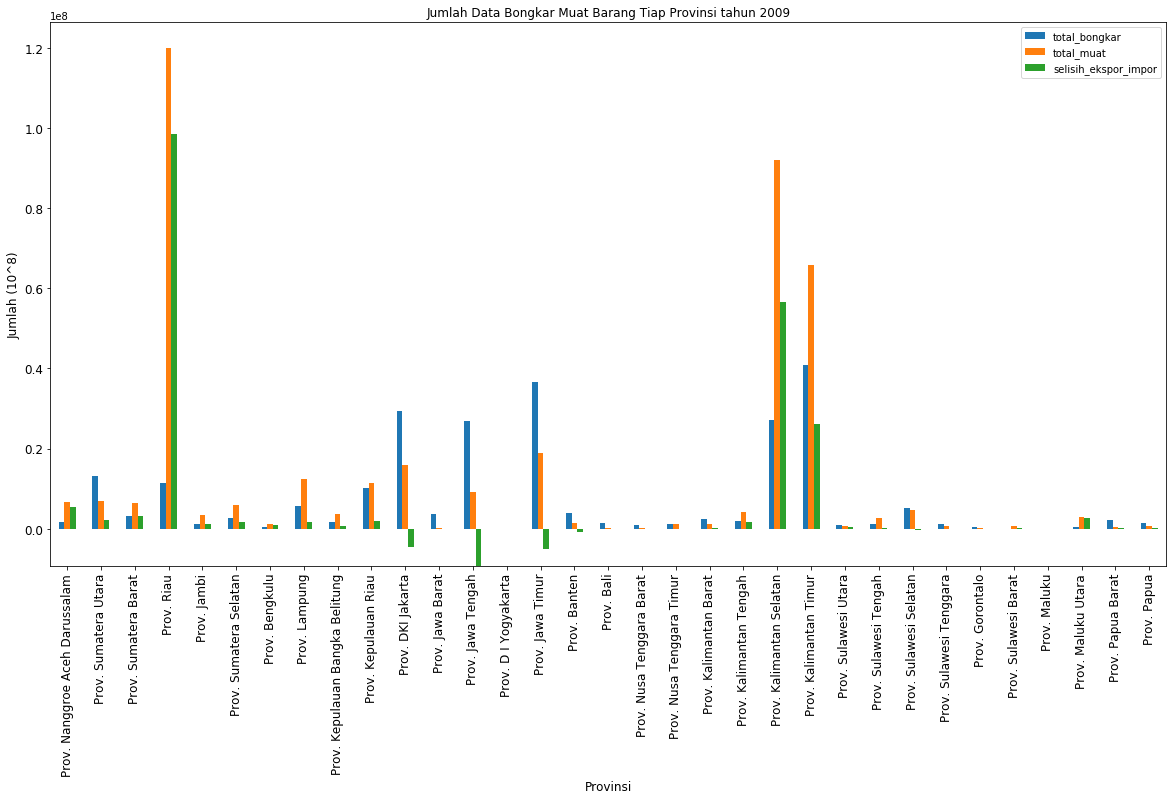

In [7]:
%matplotlib inline
data = data_laut[['nama_provinsi', 'total_bongkar', 'total_muat','selisih_ekspor_impor']]
ax = data.plot.bar(title ="Jumlah Data Bongkar Muat Barang Tiap Provinsi tahun 2009", legend=True, fontsize=12, figsize=[20,10])
ax.set_xlabel("Provinsi", fontsize=12)
ax.set_ylabel("Jumlah (10^8)", fontsize=12)
ax.set_xticks(range(len(data)))
ax.set_xticklabels(data.nama_provinsi);

Dari grafik diatas dapat dilihat perbandingan jumlah total bongkar, total muat, dan selisih ekspor impor dari pelabuhan setiap Provinsi di Indonesia pada tahun 2009. Dapat diketahui pelabuhan yang manakah yang paling banyak memuat barang untuk di kirim, membongkar barang yang diterima, juga selisihnya. Provinsi Riau merupakan provinsi yang memiliki pelabuhan dengan total muat barang tertinggi pada tahun tersebut. Semakin banyak/sibuknya pelabuhan tersebut, tentu akan berdampak besar terhadap perkembangan dan pembangunan di wilayah tersebut.

Untuk melihat persebaran jumlah pada grafik diatas dalam bentuk peta dapat dilihat pada bubble map berikut

>. **Persebaran Data Bongkar Barang di setiap Provinsi Indonesia pada 2009**

In [16]:
import folium
import pandas as pd


# Make an empty map
m = folium.Map(location=[-2.3, 115.3],
               zoom_start=5)
#---------------------
# konversi int to str karena popup harus string
data_string=data_laut['total_bongkar'].astype(str)
#---------------------
# I can add marker one by one on the map
for i in range(0,len(data_laut)):
   folium.Circle(
        location=[data_laut.iloc[i]['latitude'], data_laut.iloc[i]['longitude']],
        popup=data_laut.iloc[i]['nama_provinsi']+', Total bongkar :'+data_string.iloc[i],
#         popup=data_string.iloc[i],
#         popup=data_laut.iloc[i]['nama_provinsi'],
        radius=data_laut.iloc[i]['total_bongkar']/100,
        color='crimson',
        fill=True

   ).add_to(m)
# Save it as html
m.save('bongkarmap.html') 
# m

def inline_map(map):
    """
    Embeds the HTML source of the map directly into the IPython notebook.

    This method will not work if the map depends on any files (json data). Also this uses
    the HTML5 srcdoc attribute, which may not be supported in all browsers.
    """
    map.render()
    return HTML('<iframe srcdoc="{srcdoc}" style="width: 100%; height: 510px; border: none"></iframe>'.format(srcdoc=map.HTML.replace('"', '&quot;')))

inline_map(m)



NameError: name 'HTML' is not defined

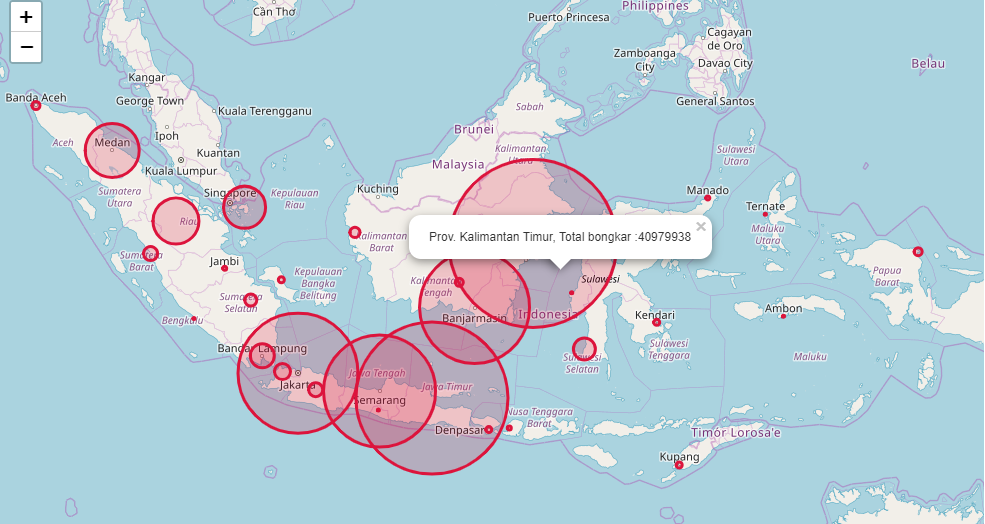

In [9]:
# %%HTML
# <iframe width="100%" height="350" src="bongkarmap.html"></iframe>
from IPython.display import Image
Image(filename='bongkar1.png') 

In [15]:
dir(map)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_children',
 '_env',
 '_get_self_bounds',
 '_id',
 '_name',
 '_parent',
 '_png_image',
 '_repr_html_',
 '_repr_png_',
 '_template',
 '_to_png',
 'add_child',
 'add_children',
 'add_tile_layer',
 'add_to',
 'choropleth',
 'control_scale',
 'crs',
 'fit_bounds',
 'get_bounds',
 'get_name',
 'get_root',
 'global_switches',
 'height',
 'keep_in_front',
 'left',
 'location',
 'max_bounds',
 'max_lat',
 'max_lon',
 'min_lat',
 'min_lon',
 'no_wrap',
 'objects_to_stay_in_front',
 'png_enabled',
 'position',
 'render',
 'save',
 'to_dict',
 'to_json',
 'top',
 'width',
 'world_copy_jump',
 'zoom_control',
 'zoom_start']

Pada peta persebaran data bongkar barang diatas, dapat dilihat bahwa provinsi di daerah Kalimantan Timur, Kalimantan Selatan, dan hampir seluruh provinsi di Jawa merupakan pelabuhan dengan kegiatan bongkar muatan barang terbesar di Indonesia. Hal ini dimungkinkan daya beli masyarakat daerah tersebut tinggi dengan banyaknya barang yang dikirim pada pelabuhan di provinsi tersebut. Untuk analisis lebih lanjut mungkin dapat ditambahkan data tingkat pendapatan daerah pada provinsi tersebut.

>. **Persebaran Data Muat Barang di setiap Provinsi Indonesia pada 2009**

In [10]:
# Make an empty map
map = folium.Map(location=[-2.3, 115.3],
               zoom_start=5)
#---------------------
# konversi int to str karena popup harus string
data_string2=data_laut['total_muat'].astype(str)
#---------------------
# I can add marker one by one on the map
for i in range(0,len(data_laut)):
   folium.Circle(
        location=[data_laut.iloc[i]['latitude'], data_laut.iloc[i]['longitude']],
        popup=data_laut.iloc[i]['nama_provinsi']+', Total muat :'+data_string2.iloc[i],
        radius=data_laut.iloc[i]['total_muat']/100,
        color="#000080",
        fill=True

   ).add_to(map)
# Save it as html
map.save('muatmap.html')  
map

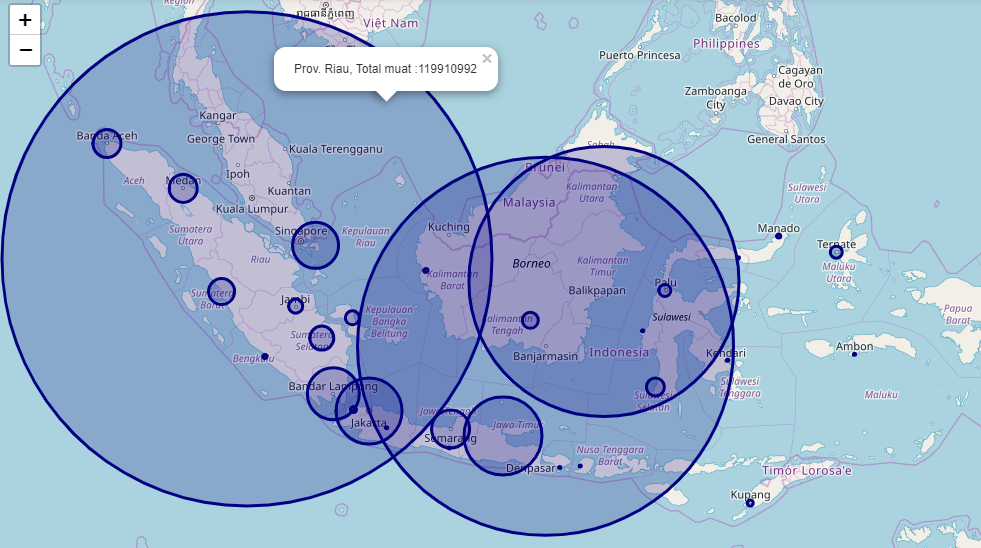

In [11]:
Image(filename='muat.png') 

Sedangkan pada peta persebaran data muat barang diatas, dapat dilihat bahwa provinsi Riau, Kalimantan Timur dan Kalimantan Tengah merupakan  pelabuhan dengan kegiatan pengiriman barang terbesar di Indonesia. Hal ini dapat menunjukkan bahwa pusat kegiatan industri berada pada provinsi tersebut, dimungkinkan wilayah dengan industri terbesar di Indonesia pada sector perkebunan, dan pertambangan batu bara. Untuk analisis lebih lanjut mungkin dapat ditambahkan data komoditi eksport barang pada setiap provinsi di Indonesia.

NB : saat dijalankan pada local notebook interactive map dapat muncul, namun saat diupload ke github selalu tidak dapat muncul, sehingga untuk sementara saya tampilkan screenshoot dari map yang terbentuk.